In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from pyEulerCurves import ECC_from_pointcloud, plot_euler_curve

## Sample points from the unit circle

In [3]:
point_cloud = []

NUMBER_OF_POINTS = 100

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([np.cos(angle), np.sin(angle)])
    
point_cloud = np.array(point_cloud)

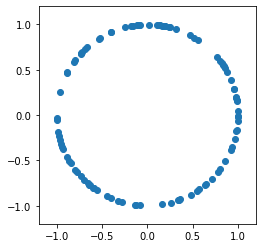

In [4]:
plt.figure()
plt.axis('scaled')
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))
plt.scatter(point_cloud[:,0], point_cloud[:,1])
plt.show()

## Full ECC

In [5]:
trans = ECC_from_pointcloud(epsilon=0.8, # max filtration
                            workers=2    # number of CPU cores
                           )

In [6]:
%%time
ecc = trans.fit_transform(point_cloud)

CPU times: user 70.4 ms, sys: 31.9 ms, total: 102 ms
Wall time: 12.2 s


In [7]:
print('{} simplices found'.format(trans.num_simplices))
print('highest dimension is {}'.format(max(trans.largest_dimension_list)))

5838976 simplices found
highest dimension is 21


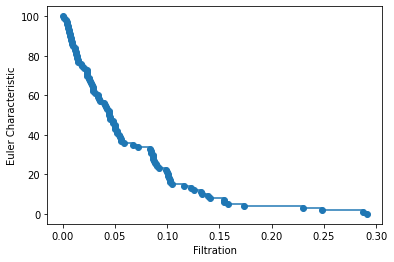

In [8]:
# note how the EC is constant after epsilon=0.3
fig, axs = plt.subplots(1)

im0 = plot_euler_curve(ecc, axs, with_lines=True)

In [9]:
ecc[-1]

[0.2911514096055089, 0]

## ECC with max_dimension = 2

In [10]:
trans = ECC_from_pointcloud(epsilon=0.8, # max filtration
                            max_dimension = 2, # max dimesion of the simplices
                            workers=2    # number of CPU cores
                           )

In [11]:
%%time
ecc = trans.fit_transform(point_cloud)

CPU times: user 61.2 ms, sys: 29.9 ms, total: 91.1 ms
Wall time: 5.05 s


In [12]:
print('{} simplices found'.format(trans.num_simplices))
print('highest dimension is {}'.format(max(trans.largest_dimension_list)))

9365 simplices found
highest dimension is 2


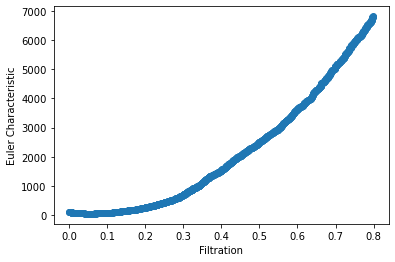

In [13]:
fig, axs = plt.subplots(1)

im0 = plot_euler_curve(ecc, axs, with_lines=False)